In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [276]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


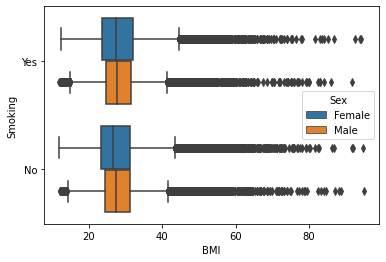

In [277]:
sns.boxplot(x="BMI",y="Smoking",hue="Sex",data=df)
plt.show()

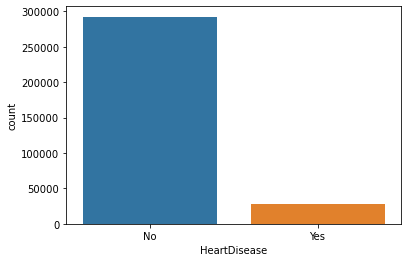

In [278]:
sns.countplot(df["HeartDisease"])
plt.show()

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### Numeric Features: BMI,PhysicalHealth,MenthalHealth,SleepTime
#### Categorical Features: OTHERS

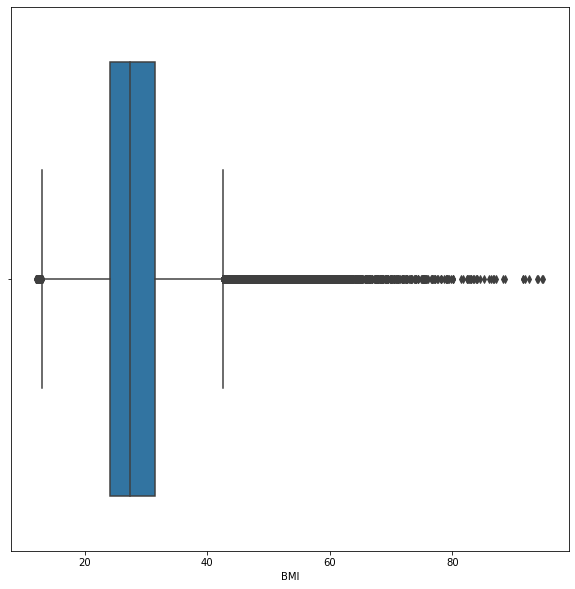

In [280]:
plt.figure(figsize=(10,10))
sns.boxplot(df["BMI"])
plt.show()

In [281]:
df[df["BMI"]>60]["Race"].value_counts()

White                             272
Hispanic                           93
Black                              76
Other                              29
American Indian/Alaskan Native     17
Asian                               5
Name: Race, dtype: int64

#### Görüldüğü üzere BMI(Vücut Kitle Endeksi) Çok fazla aykırı değer içeriyor burada belirli trasholdlara göre kategorilere ayırabiliriz

In [282]:
df.isnull().sum()
# Eksik Değer Yok

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

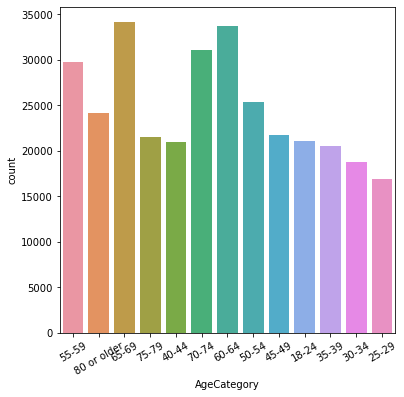

In [283]:
plt.figure(figsize=(6,6))
sns.countplot(df["AgeCategory"])
plt.xticks(rotation=30)
plt.show()

### BMI-HeartDisease Arasındaki İlişki

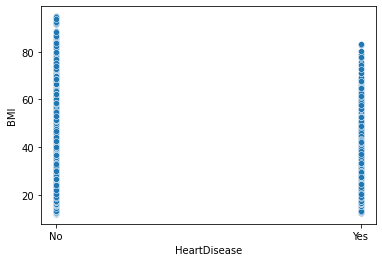

In [284]:

sns.scatterplot(x="HeartDisease",y="BMI",data=df)
plt.show()

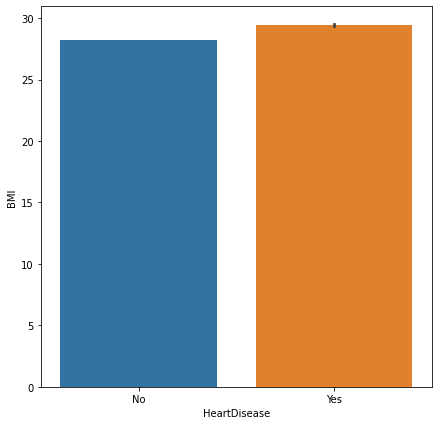

In [285]:
plt.figure(figsize=(7,7))
sns.barplot(x="HeartDisease",y="BMI",data=df)
plt.show()

## Numeric Verilerin Birbirleri arasındaki İlişki

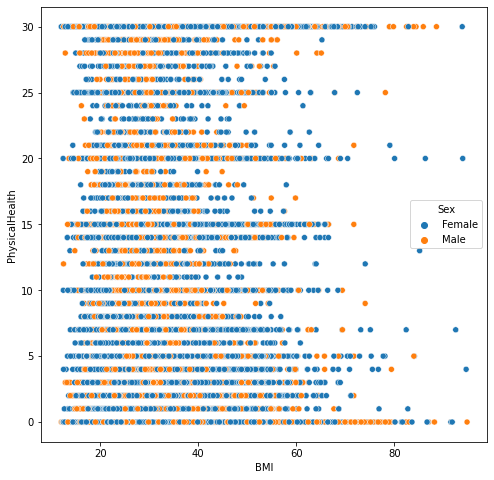

In [286]:
#BMI,PhysicalHealth,MenthalHealth,SleepTime
plt.figure(figsize=(8,8))
sns.scatterplot(x="BMI",y="PhysicalHealth",data=df,hue="Sex")
plt.show()

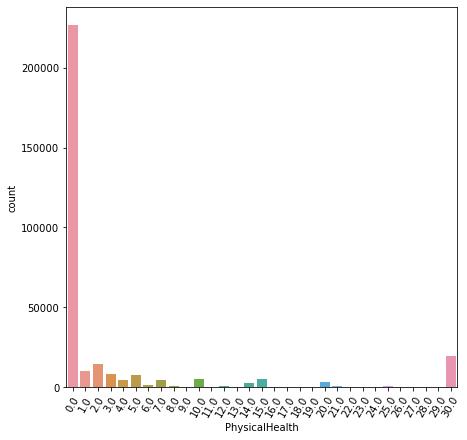

In [287]:
plt.figure(figsize=(7,7))
sns.countplot(df["PhysicalHealth"])
plt.xticks(rotation=60)
plt.show()

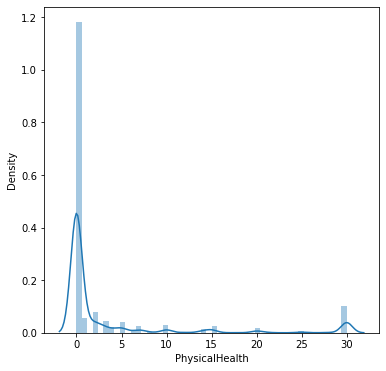

In [288]:
plt.figure(figsize=(6,6))
sns.distplot(df["PhysicalHealth"])
plt.show()

#### Bu grafikte görüldüğü gibi son 30 gün içerisinde hiç hastalık geçirmeyenlerin sayısı bir hayli fazlyaken diğer durumlar için aynı şey söylenemez bu durumda yapmamız gereken hiç geçirmedik ve geçirdik diyerek kategorikleştirmketir.

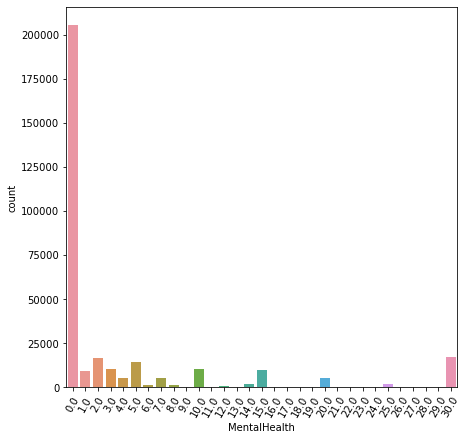

In [289]:
plt.figure(figsize=(7,7))
sns.countplot(df["MentalHealth"])
plt.xticks(rotation=60)
plt.show()

#### MentalHealth değişkeni de PhsicalHealth gibi davranıyor bu yüzden bu değişkenide kategorize etmeyi düşünebiliriz.Mesela 0-10 1,
#### 10-20 2, 20-30 3

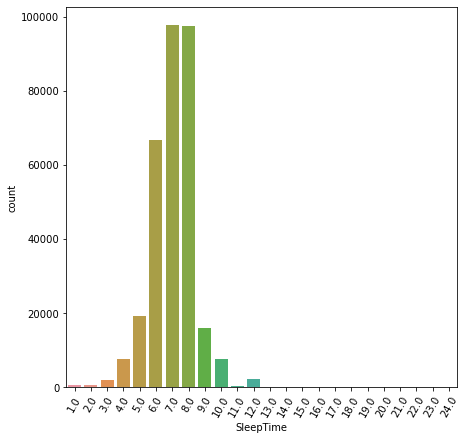

In [290]:
plt.figure(figsize=(7,7))
sns.countplot(df["SleepTime"])
plt.xticks(rotation=60)
plt.show()

#### SleepTime değişkeninde dağılım normal dağılıma çok yakın ve bu değişkeni hastalık üzerinde incelediğimizde neredeyse aynı oranda etki ediyor bu yüzden outlier değer çıkarmanın bir zararı olmayacağını düşündüm.Sonuçta 4543 tane outlier değeri veri setinden çıkardık

In [291]:
data=df["SleepTime"]
q1=data.quantile(0.25)
q3=data.quantile(0.75)
ıqr=q3-q1
alt=q1-1.5*ıqr
ust=q3+1.5*ıqr

In [292]:
print(ıqr)
print(q3)
print(q1)
print(alt)
print(ust)

2.0
8.0
6.0
3.0
11.0


In [293]:
out_list=df[(df["SleepTime"]<alt) | (df["SleepTime"]>ust)].index

In [294]:
df.shape

(319795, 18)

In [295]:
df.iloc[out_list,:].index

Int64Index([     5,     10,     50,    206,    235,    250,    262,    288,
               371,    382,
            ...
            318988, 319163, 319229, 319290, 319371, 319373, 319394, 319408,
            319702, 319793],
           dtype='int64', length=4543)

In [296]:
df.drop(df.iloc[out_list,:].index,axis=0,inplace=True)

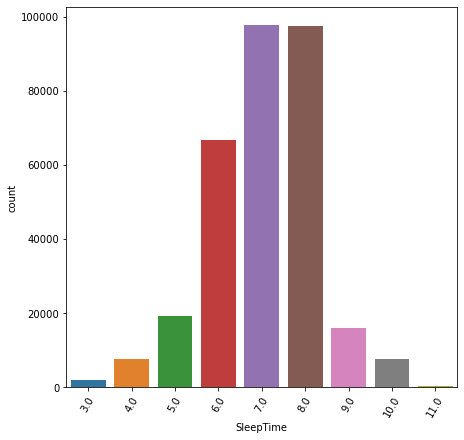

In [297]:
plt.figure(figsize=(7,7))
sns.countplot(df["SleepTime"])
plt.xticks(rotation=60)
plt.show()

### Burada numeric verilerin analizini bitirdik kategoric verilerin analizini de bitirdikten sonra gerekli aksiyonları alacağız.

In [298]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Kategorik Veri Analizi ve Veri Önişleme

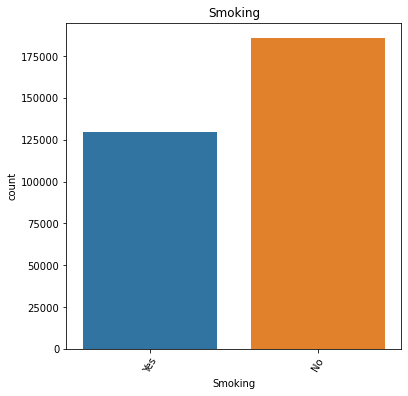

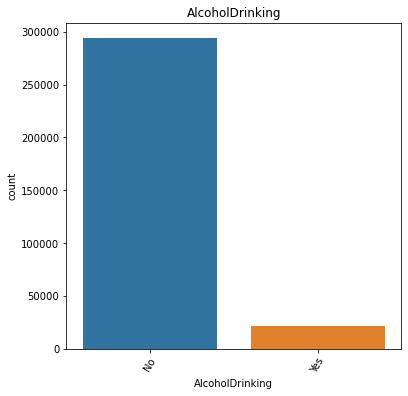

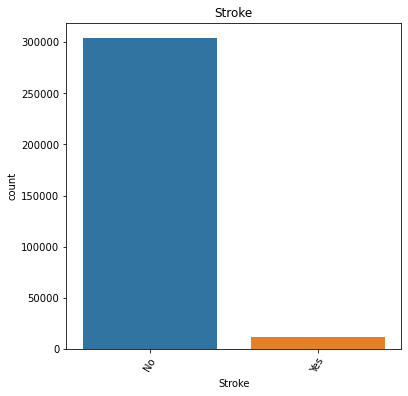

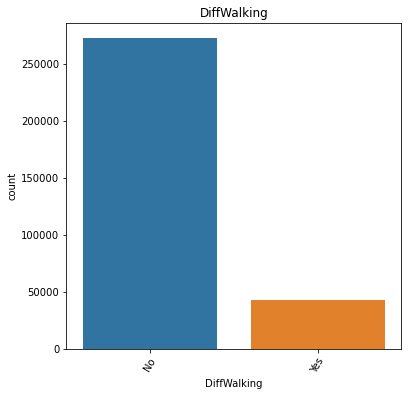

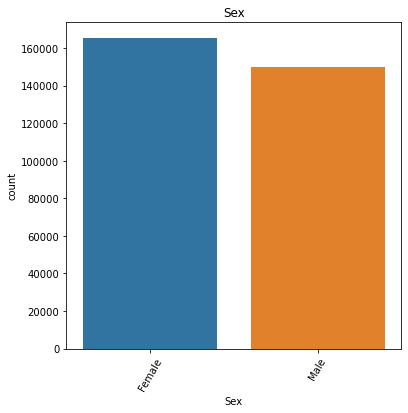

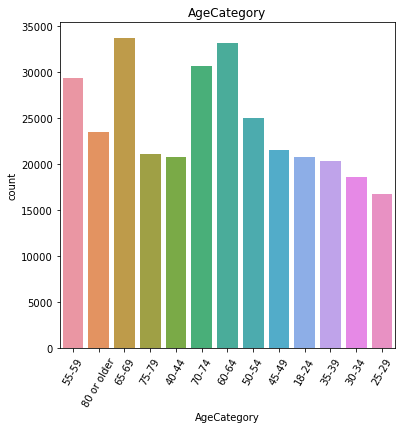

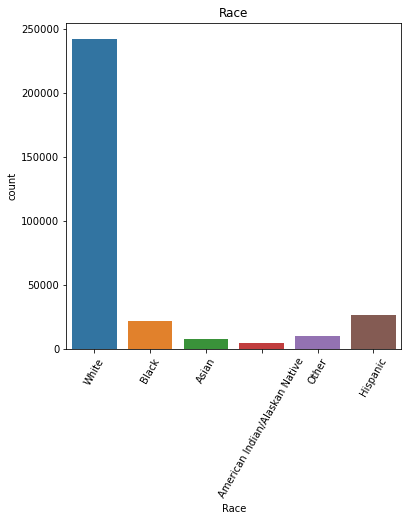

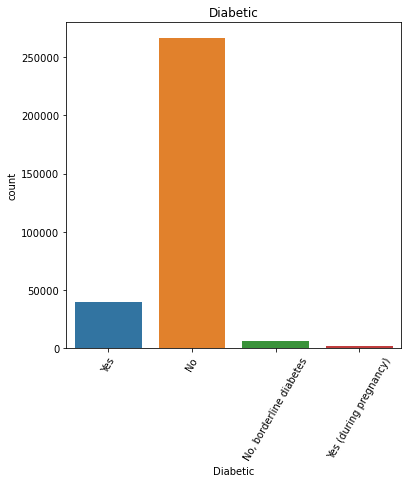

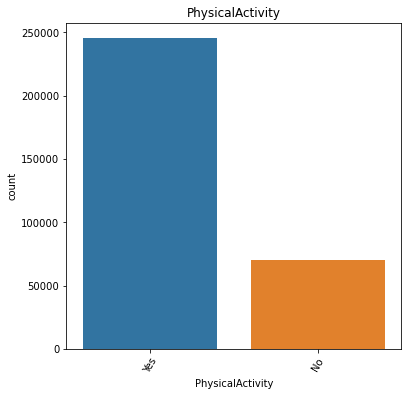

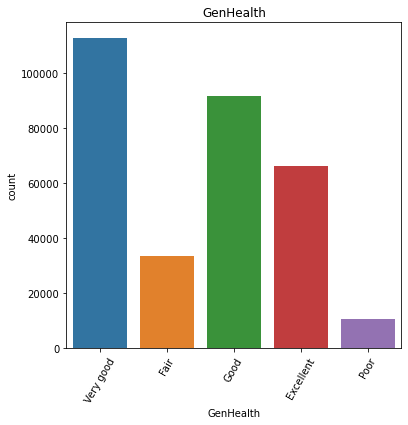

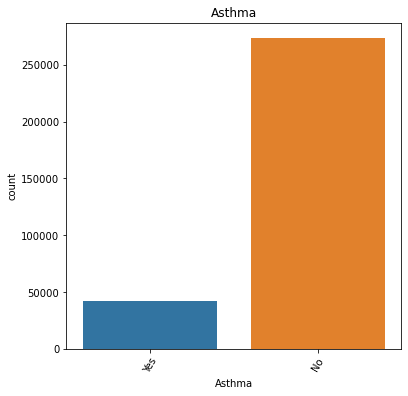

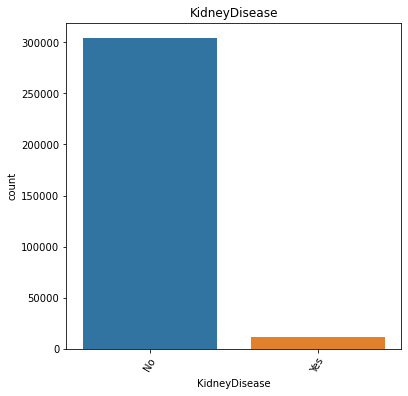

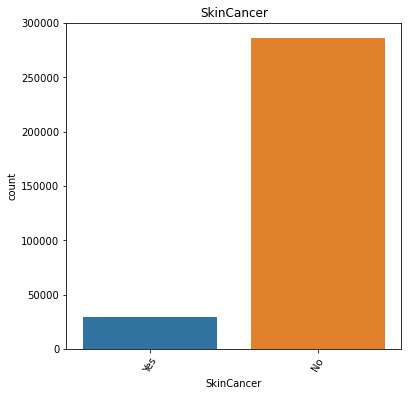

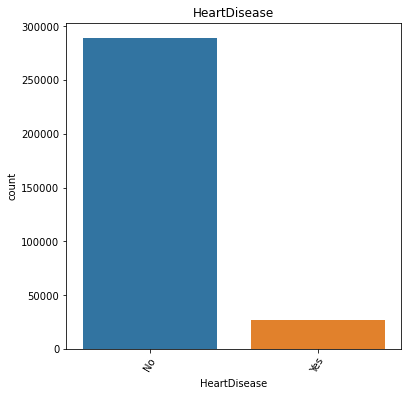

In [299]:
cat_list=["Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer","HeartDisease"]
for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(df[i])
    plt.xticks(rotation=60)
    plt.title(i)
    plt.show()

* Age Category değişkeninde 25 ile 55 arasını  0 kalanları 1 olarak encode edebiliriz
* Race değişkenini beyaz,black,hispanic ve diğerleri şeklinde encode edebiliriz.

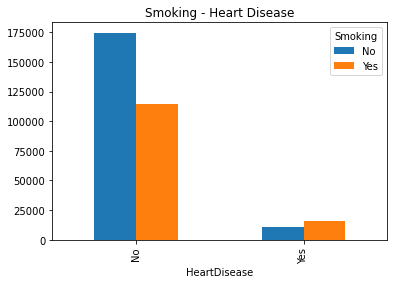

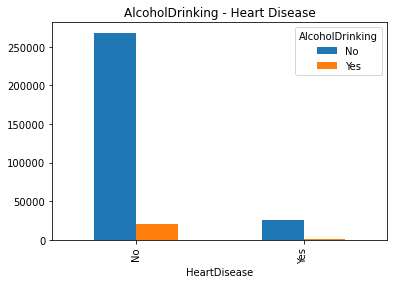

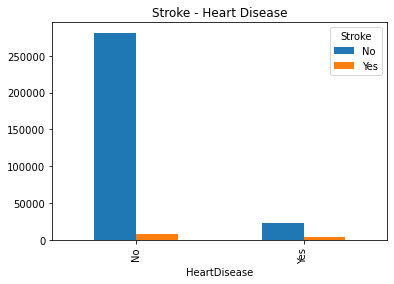

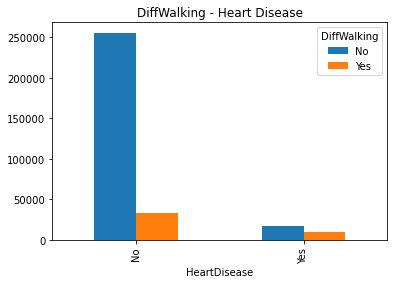

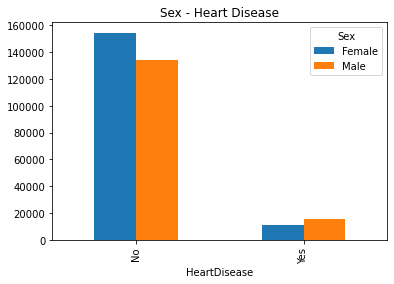

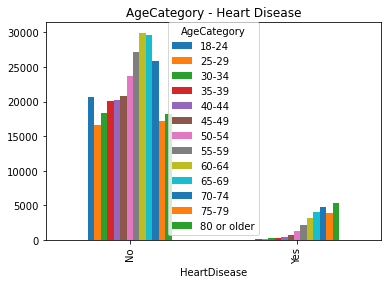

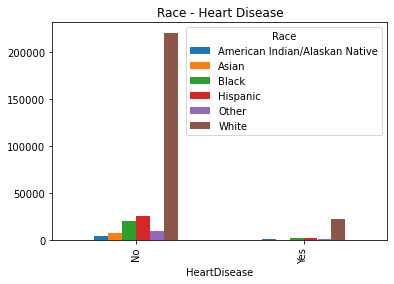

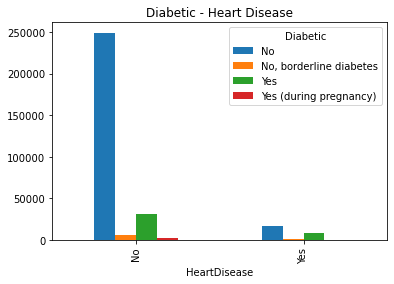

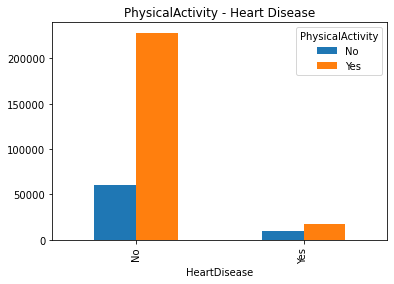

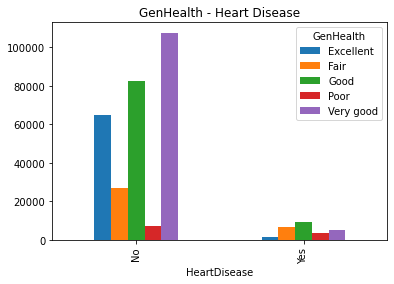

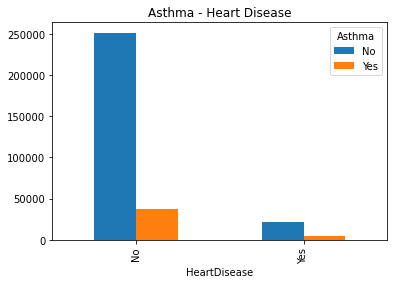

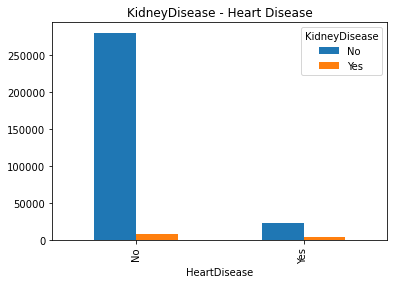

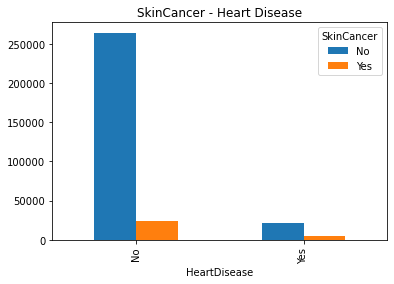

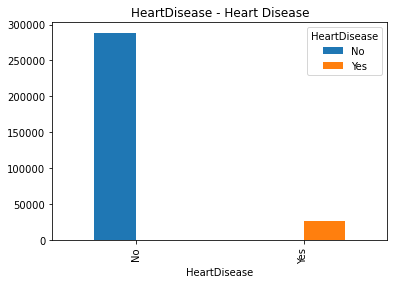

In [300]:
for i in cat_list:
    cros_result=pd.crosstab(df["HeartDisease"],df[i])
    cros_result.plot.bar()
    plt.title("{} - Heart Disease".format(i))
    plt.show()

* Sigara içenler içemeyenlere oranla daha fazla kalp hastası olam olasılığına sahip ama bu değişken çok da belirleyici değil.
* Alkol almak da sigara ile benzer çıktılara sahip hatta sigara içenler alkol alanlara göre daha fazla kalp hastası var.
* Erkeklerin kalp hastası olma olasılığı kadınlara göre fazladır sonucunu çıkarabiliriz.
* Yaş ilerledikçe kalp hastası olma olasılığı artıyor.Gariptir ki 70-74 arasındaki kişilerin kalp hastası olma olasılığı 75-79 dan fazla
* Irk kalp hastalığı üstünde çok bir etkiye sahip değil (Beyazlar ve diğerleri olacak şekilde kategorilendirilebilir)

In [301]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


AgeCategory Değişkenini belirli yaşlara göre kategorize ettik

In [302]:
age_list1=["18-24","25-29","30-34","35-39","40-44"]
age_list2=["45-49","50-54","55-59","60-64","65-69","70-74"]

In [303]:
df["AgeCategory"]=[0 if i in age_list1 else 1 if i in age_list2 else 2 for i in df["AgeCategory"]]

In [304]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,1,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,2,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,1,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,2,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,0,White,No,Yes,Very good,8.0,No,No,No


In [305]:
df=pd.get_dummies(df,columns=["AgeCategory"])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_0,AgeCategory_1,AgeCategory_2
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0,1,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,Very good,7.0,No,No,No,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,Fair,8.0,Yes,No,No,0,1,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,Good,6.0,No,No,Yes,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,Very good,8.0,No,No,No,1,0,0


In [306]:
df["HeartDisease"]=[1 if i=="Yes" else 0 for i in df["HeartDisease"]]

In [307]:
cat_list

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'HeartDisease']

In [308]:
cat_list2=["Smoking","AlcoholDrinking","Stroke","DiffWalking","Diabetic","PhysicalActivity","Asthma","SkinCancer","KidneyDisease"]
for i in cat_list2:
    df[i]=[1 if j=="Yes" else 0 for j in df[i]]

In [309]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_0,AgeCategory_1,AgeCategory_2
0,0,16.60,1,0,0,3.0,30.0,0,Female,White,1,1,Very good,5.0,1,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,Female,White,0,1,Very good,7.0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,Male,White,1,1,Fair,8.0,1,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,White,0,0,Good,6.0,0,0,1,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,White,0,1,Very good,8.0,0,0,0,1,0,0


In [310]:
df["Sex"]=[1 if i=="Female" else 0 for i in df["Sex"]]

In [311]:
df["GenHealth"].value_counts()

Very good    112908
Good          91810
Excellent     66273
Fair          33693
Poor          10568
Name: GenHealth, dtype: int64

In [312]:
df["GenHealth"]=[0 if i=="Very good" else 1 if i=="Good" else 2 if i=="Excellent" else 3 if i=="Fair" else 4 for i in df["GenHealth"]]

In [313]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_0,AgeCategory_1,AgeCategory_2
0,0,16.60,1,0,0,3.0,30.0,0,1,White,1,1,0,5.0,1,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,White,0,1,0,7.0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,White,1,1,3,8.0,1,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,White,0,0,1,6.0,0,0,1,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,White,0,1,0,8.0,0,0,0,1,0,0


In [314]:
df=pd.get_dummies(df,columns=["GenHealth"])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,...,KidneyDisease,SkinCancer,AgeCategory_0,AgeCategory_1,AgeCategory_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,0,16.60,1,0,0,3.0,30.0,0,1,White,...,0,1,0,1,0,1,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,1,White,...,0,0,0,0,1,1,0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,White,...,0,0,0,1,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,White,...,0,1,0,0,1,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,White,...,0,0,1,0,0,1,0,0,0,0


In [315]:
df["Race"]=[0 if i=="White" else 1 if i=="Black" else 2 for i in df["Race"]]

In [316]:
df=pd.get_dummies(df,columns=["Race"])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_1,AgeCategory_2,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,Race_0,Race_1,Race_2
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,1,0,1,0,0,0,0,1,0,0
1,0,20.34,0,0,1,0.0,0.0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [317]:
for i in cat_list2:
    df[i]=df[i].astype("category")
    df=pd.get_dummies(df,i)

In [318]:
cat_list2

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'SkinCancer',
 'KidneyDisease']

In [319]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Sex,SleepTime,AgeCategory_0,AgeCategory_1,AgeCategory_2,GenHealth_0,...,Diabetic_0,Diabetic_1,PhysicalActivity_0,PhysicalActivity_1,Asthma_0,Asthma_1,SkinCancer_0,SkinCancer_1,KidneyDisease_0,KidneyDisease_1
0,0,16.60,3.0,30.0,1,5.0,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
1,0,20.34,0.0,0.0,1,7.0,0,0,1,1,...,1,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,0,8.0,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
3,0,24.21,0.0,0.0,1,6.0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
4,0,23.71,28.0,0.0,1,8.0,1,0,0,1,...,1,0,0,1,1,0,1,0,1,0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315252 entries, 0 to 319794
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   HeartDisease        315252 non-null  int64  
 1   BMI                 315252 non-null  float64
 2   PhysicalHealth      315252 non-null  float64
 3   MentalHealth        315252 non-null  float64
 4   Sex                 315252 non-null  int64  
 5   SleepTime           315252 non-null  float64
 6   AgeCategory_0       315252 non-null  uint8  
 7   AgeCategory_1       315252 non-null  uint8  
 8   AgeCategory_2       315252 non-null  uint8  
 9   GenHealth_0         315252 non-null  uint8  
 10  GenHealth_1         315252 non-null  uint8  
 11  GenHealth_2         315252 non-null  uint8  
 12  GenHealth_3         315252 non-null  uint8  
 13  GenHealth_4         315252 non-null  uint8  
 14  Race_0              315252 non-null  uint8  
 15  Race_1              315252 non-nul

In [321]:
df["Sex"]=df["Sex"].astype("category")
df=pd.get_dummies(df,columns=["Sex"])
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory_0,AgeCategory_1,AgeCategory_2,GenHealth_0,GenHealth_1,...,PhysicalActivity_0,PhysicalActivity_1,Asthma_0,Asthma_1,SkinCancer_0,SkinCancer_1,KidneyDisease_0,KidneyDisease_1,Sex_0,Sex_1
0,0,16.60,3.0,30.0,5.0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,0,1
2,0,26.58,20.0,30.0,8.0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,0,24.21,0.0,0.0,6.0,0,0,1,0,1,...,1,0,1,0,0,1,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,0,1


In [322]:
df["HeartDisease"]=df["HeartDisease"].astype("category")

BMI:18.5’ten küçük ise zayıf 18.5-24.9 kg/m aralığında ise Normal kilolu 25-29.9 kg/m aralığında ise Fazla kilolu 30-39.9 kg/m aralığında ise Obez 40 kg/m’nin üzerinde ise ileri derecede obez

In [323]:
df["BMI"]=[0 if i<18.5 else 1 if (i>=18.5 and i<24.9) else 2 if (i>=24.9 and i<29.9) else 3 if (i>=29.9 and i<39.9) else 4 for i in df["BMI"]]

In [324]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategory_0,AgeCategory_1,AgeCategory_2,GenHealth_0,GenHealth_1,...,PhysicalActivity_0,PhysicalActivity_1,Asthma_0,Asthma_1,SkinCancer_0,SkinCancer_1,KidneyDisease_0,KidneyDisease_1,Sex_0,Sex_1
0,0,0,3.0,30.0,5.0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0,1,0.0,0.0,7.0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,0,1
2,0,2,20.0,30.0,8.0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,0,1,0.0,0.0,6.0,0,0,1,0,1,...,1,0,1,0,0,1,1,0,0,1
4,0,1,28.0,0.0,8.0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,0,1


In [325]:
df["BMI"].value_counts()

2    113476
1     93792
3     86694
4     16297
0      4993
Name: BMI, dtype: int64

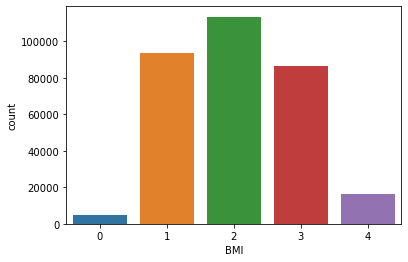

In [326]:
sns.countplot(df["BMI"])
plt.show()

In [327]:
"""df["BMI"]=df["BMI"].astype("category")
df=pd.get_dummies(df,"BMI")
df.head()"""

'df["BMI"]=df["BMI"].astype("category")\ndf=pd.get_dummies(df,"BMI")\ndf.head()'

## Modelling

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [329]:
x=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [332]:
log_reg=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
model_list=[log_reg,dt,knn,rf,nb]

In [333]:

for i in model_list:
    i.fit(x_train,y_train)
    print("{} modelinin accuracy score'u {}".format(i,i.score(x_test,y_test)))

LogisticRegression() modelinin accuracy score'u 0.9179235856687443
DecisionTreeClassifier() modelinin accuracy score'u 0.8873134446717736
KNeighborsClassifier() modelinin accuracy score'u 0.9108182265150434
RandomForestClassifier() modelinin accuracy score'u 0.907440008881699
GaussianNB() modelinin accuracy score'u 0.8280756847631282
